In [31]:
from numpy import hstack
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from matplotlib import pyplot

In [32]:
def generate_samples(n):
    X1=np.random.rand(n)-0.5
    X2=X1
    X1=X1.reshape(n,1)
    X2=X2.reshape(n,1)
    X=hstack((X1,X2))
    return X

In [33]:
def define_discriminator(n_inputs=2):
    model=Sequential()
    model.add(Dense(25,activation='relu',kernel_initializer='he_uniform',input_dim=n_inputs))
    model.add(Dense(1,activation='sigmoid'))
    model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
    return model

In [34]:
def define_generator(latent_dim,n_outputs=2):
    model=Sequential()
    model.add(Dense(15,activation='relu',kernel_initializer='he_uniform',input_dim=latent_dim))
    model.add(Dense(n_outputs,activation='linear'))
    return model

In [35]:
def define_gan(generator,discriminator):
    discriminator.trainable=False
    model=Sequential()
    model.add(generator)
    model.add(discriminator)
    model.compile(loss='binary_crossentropy',optimizer='adam')
    return model

In [36]:
def generate_fake_samples(generator,latent_dim,n):
    x_input=generate_latent_points(latent_dim,n)
    X=generator.predict(x_input)
    y=np.zeros((n,1))
    return X,y

In [37]:
def generate_latent_points(latent_dim,n):
    x_input=np.random.randn(latent_dim*n)
    x_input=x_input.reshape(n,latent_dim)
    return x_input

In [38]:
data=generate_samples(10000)

In [39]:
def train(g_model,d_model,gan_model,data,latent_dim,n_epoches=10000,n_batch=128,n_eval=200):
    half_batch=int(n_batch/2)
    for i in range(n_epoches):
        x_real=data[np.random.randint(0,len(data)-1,half_batch)]
        y_real=np.ones((half_batch,1))
        x_fake,y_fake=generate_fake_samples(g_model,latent_dim,half_batch)
        d_model.train_on_batch(x_real,y_real)
        d_model.train_on_batch(x_fake,y_fake)
        x_gan=generate_latent_points(latent_dim,n_batch)
        y_gan=np.ones((n_batch,1))
        gan_model.train_on_batch(x_gan,y_gan)
        if (i+1)%n_eval==0:
            summarize_performance(i,g_model,d_model,data,latent_dim)

In [40]:
def summarize_performance(epoch,generator,discriminator,data,latent_dim,n=100):
    x_real=data[np.random.randint(0,len(data)-1,n)]
    y_real=np.ones((n,1))
    _,acc_real=discriminator.evaluate(x_real,y_real,verbose=0)
    x_fake,y_fake=generate_fake_samples(generator,latent_dim,n)
    _,acc_fake=discriminator.evaluate(x_fake,y_fake,verbose=0)
    print(epoch, acc_real, acc_fake)
    pyplot.scatter(x_real[:,0],x_real[:,1],color='red')
    pyplot.scatter(x_fake[:,0],x_fake[:,1],color='blue')
    pyplot.show()

199 0.54 0.79


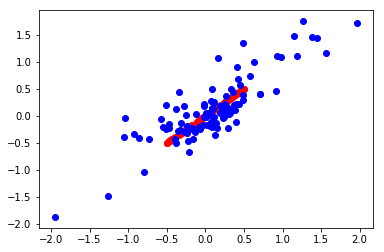

399 1.0 0.39


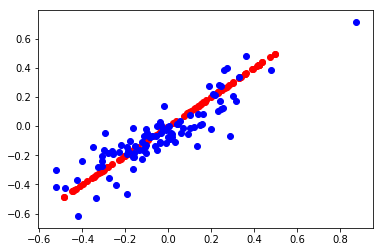

599 1.0 0.22


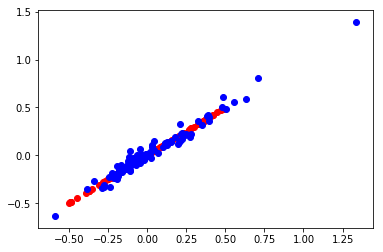

799 0.58 0.53


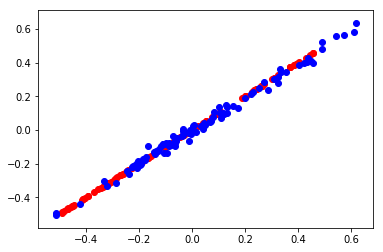

999 0.64 0.17


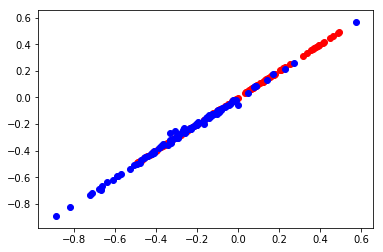

1199 0.5 0.11


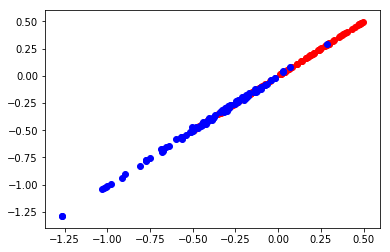

1399 0.17 1.0


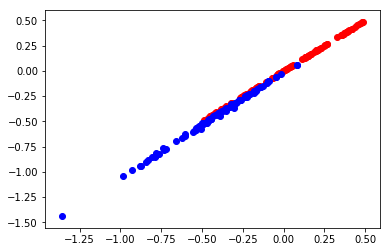

1599 0.46 0.06


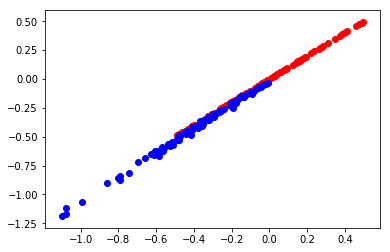

1799 0.39 0.03


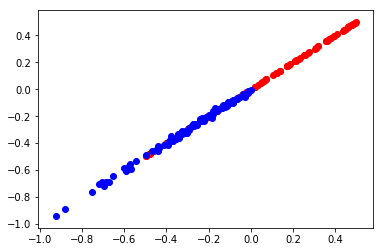

1999 0.61 0.69


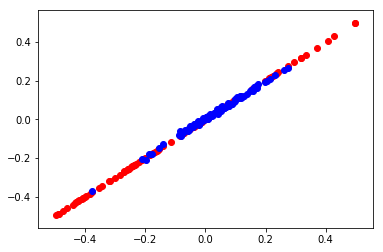

2199 0.54 0.88


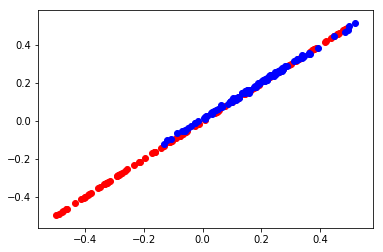

2399 0.74 0.55


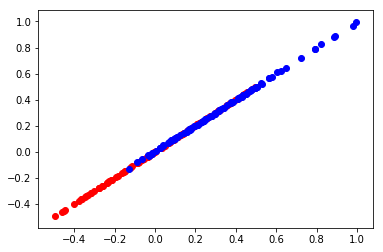

2599 0.42 0.42


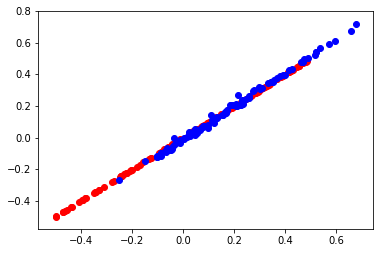

2799 0.38 1.0


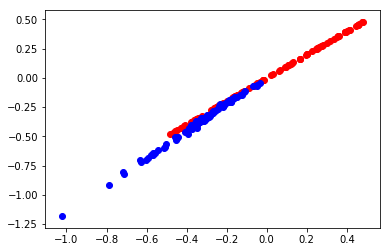

2999 0.66 0.55


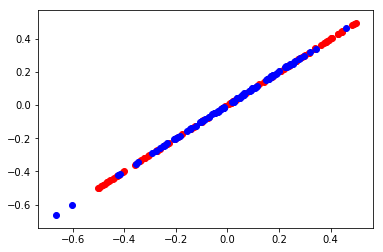

3199 0.55 0.59


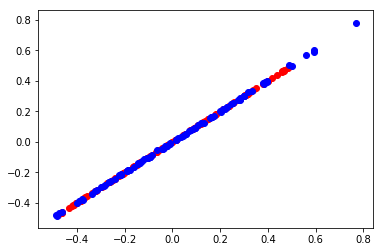

3399 0.55 0.52


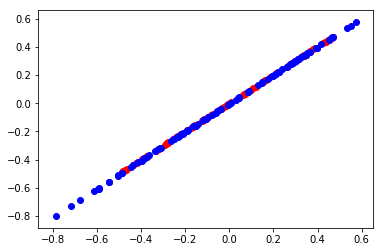

3599 0.39 0.56


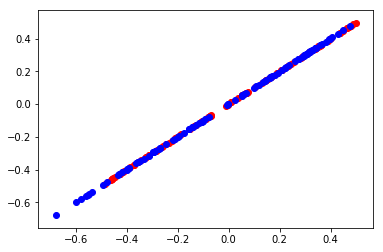

3799 0.45 0.69


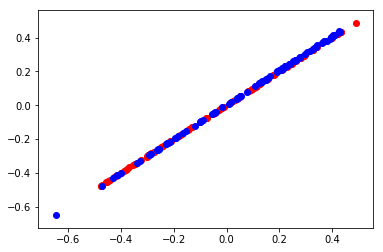

3999 0.46 0.47


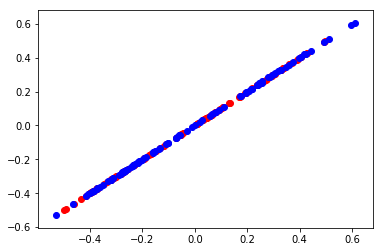

4199 0.45 0.55


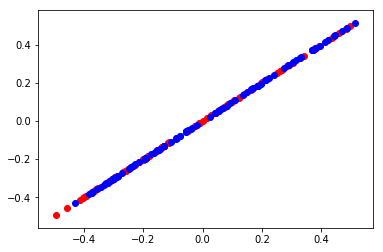

4399 0.0 1.0


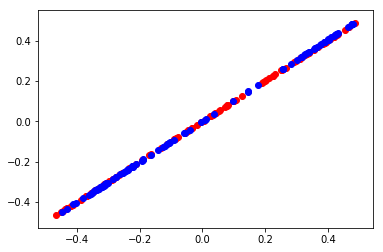

4599 0.0 1.0


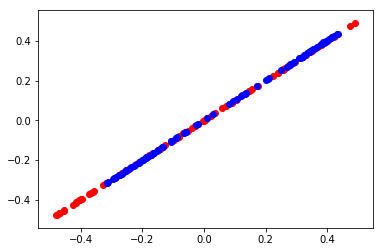

4799 0.48 0.48


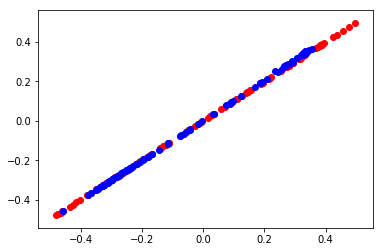

4999 0.39 0.61


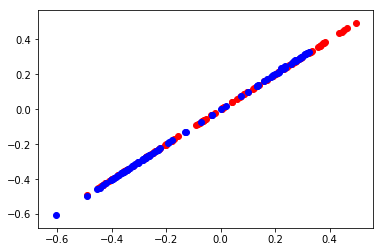

5199 0.32 0.58


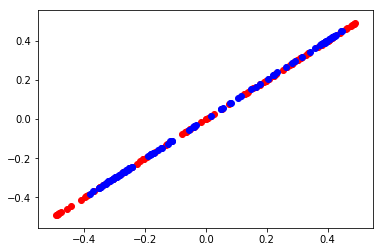

5399 0.44 0.61


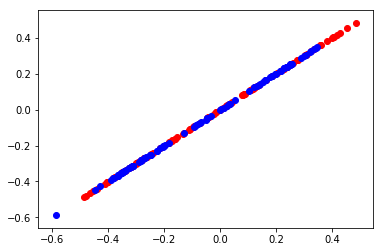

5599 0.3 0.64


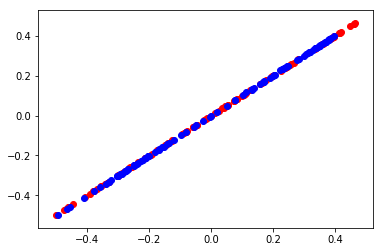

5799 0.41 0.44


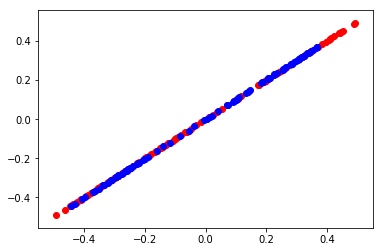

5999 0.8 0.09


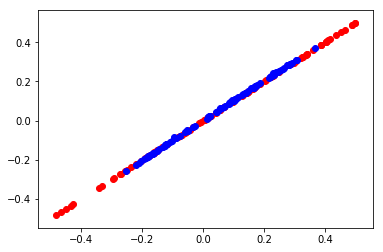

6199 0.71 0.16


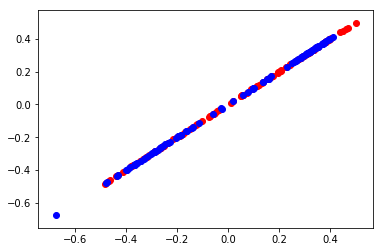

6399 0.33 0.65


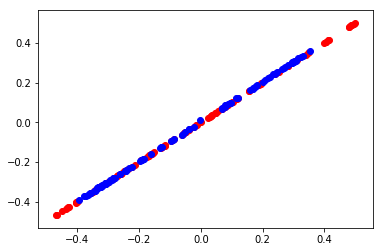

6599 0.47 0.4


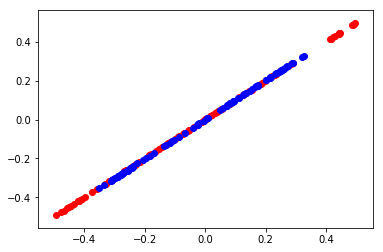

6799 0.9 0.05


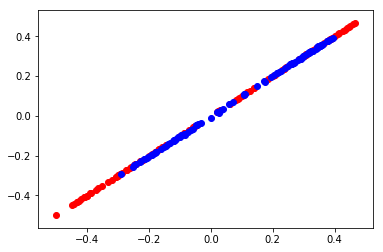

6999 0.22 0.69


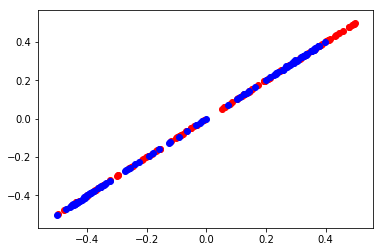

7199 0.71 0.52


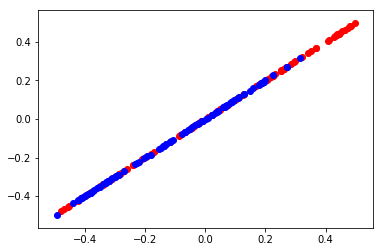

7399 0.27 0.77


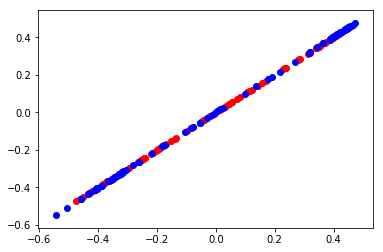

7599 0.86 0.31


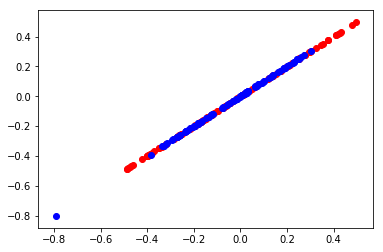

7799 0.39 0.49


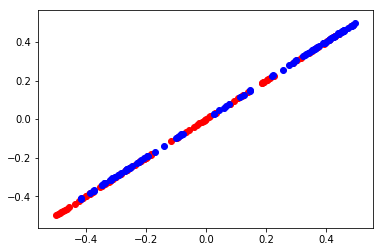

7999 0.48 0.51


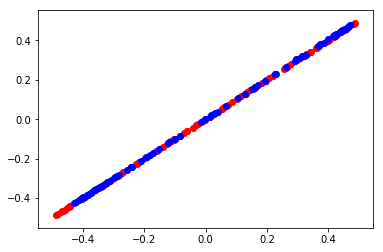

8199 0.46 0.45


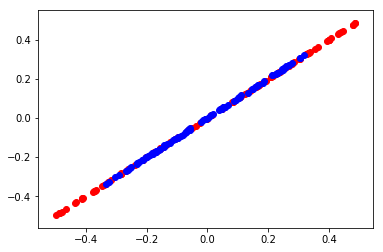

8399 0.41 0.62


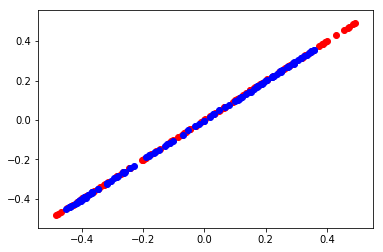

8599 0.54 0.51


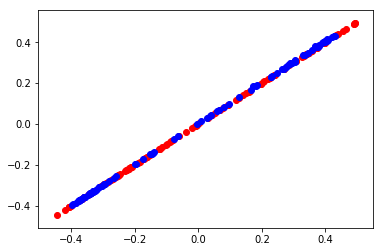

8799 0.43 0.51


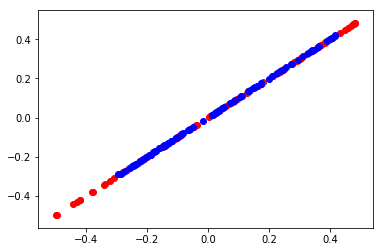

8999 0.78 0.43


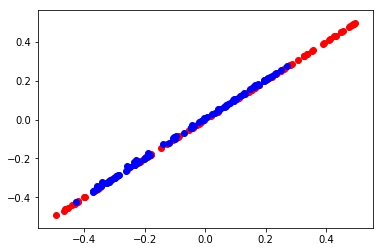

9199 0.45 0.62


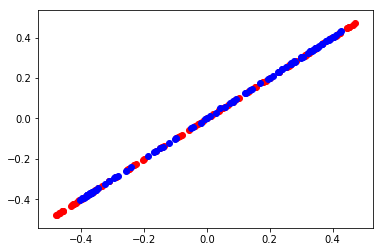

9399 0.27 0.61


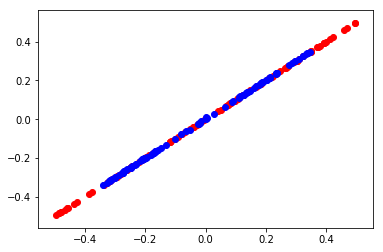

9599 0.63 0.52


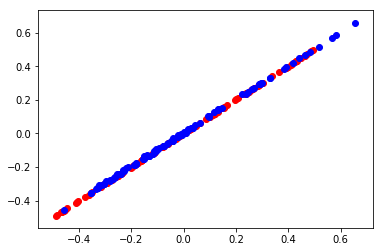

9799 0.11 0.72


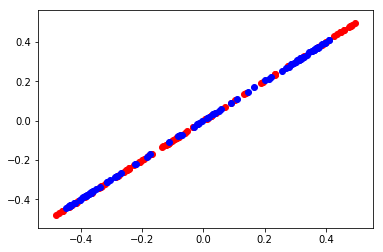

9999 0.3 0.83


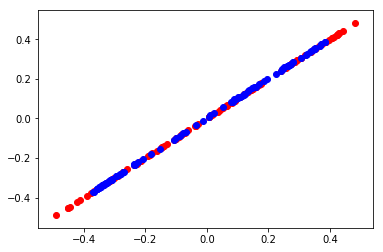

In [41]:
latent_dim=5
discriminator=define_discriminator()
generator=define_generator(latent_dim)
gan_model=define_gan(generator,discriminator)
train(generator,discriminator,gan_model,data,latent_dim)

In [42]:
a,b=generate_fake_samples(generator,5,100)

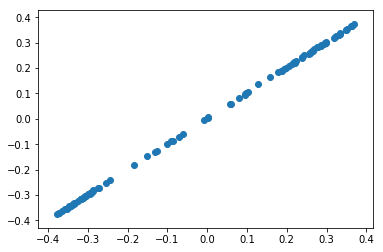

In [43]:
pyplot.scatter(a[:,0],a[:,1])